## Observations and Insights

Summary
1. This is a research study on the effectiveness of 10 drug regimens to reduce the SCC tumor growth. Capomulin, the drug of interest, has the most data points at 230. In addition, the mean tumor volume is the lowest for the Ramicane regimen, as well as the their median tumor volume. Only the drug regimen of Infubinol has a tumor volume outlier at 36.32 mm3.
2. The gender distribution is almost equal that 50.6% of the mice are male, and 49.4% are female. This almost-equal distribution in gender is crucial in research because it can reduce the selection bias regarding gender effects in drug reactions. 
3. Based on the box plot of the final tumor volume of each mouse across four regimes of interest, the average final tumor volumes are obviously lower when treated with Capomulin or Ramicane, rather than Infubinol or Ceftamin. 
4. Based on the scatter plot and linear regression analysis of mouse weight versus average tumor volume for the Capomulin regimen, a strong positive linear relationship has been shown with an equation of y=0.95x + 21.55, which means that mice weighted heavier would have heavier tumor volumes on average. With a P value of 0.00  and a 0.84 correlation coefficient for both factors, the mouse weight is a highly significant factor in predicting the average tumor volume. 

## Dependencies and starter code

In [58]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
new_df=pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
new_df.head()

# All columns:
# Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
#        'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
#       dtype='object')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen=new_df["Drug Regimen"].value_counts()
regimen

tumorvol=new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

tumorvol_mean=pd.DataFrame(round((tumorvol.mean()),2))
tumorvol_median=pd.DataFrame(round((tumorvol.median()),2))
tumorvol_var=pd.DataFrame(round((tumorvol.var()),2))
tumorvol_std=pd.DataFrame(round((tumorvol.std()),2))
tumorvol_sem=pd.DataFrame(round((tumorvol.sem()),2))

summary=pd.merge(tumorvol_mean, tumorvol_median, on='Drug Regimen', how="outer")
summary=summary.rename(columns={"Tumor Volume (mm3)_x": "Mean Tumor Volume (mm3)", "Tumor Volume (mm3)_y": "Median Tumor Volume (mm3)"})
summary1=pd.merge(summary, tumorvol_var, on='Drug Regimen', how="outer")
summary1=summary1.rename(columns={"Tumor Volume (mm3)": "The Variance of Tumor Volume (mm3)"})
summary2=pd.merge(summary1, tumorvol_std, on='Drug Regimen', how="outer")
summary2=summary2.rename(columns={"Tumor Volume (mm3)": "The Standard Deviation of Tumor Volume (mm3)"})
summary3=pd.merge(summary2, tumorvol_sem, on='Drug Regimen', how="outer")
summary3=summary3.rename(columns={"Tumor Volume (mm3)": "The Standard Errors of Tumor Volume (mm3)"})
summary3





,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),The Variance of Tumor Volume (mm3),The Standard Deviation of Tumor Volume (mm3),The Standard Errors of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

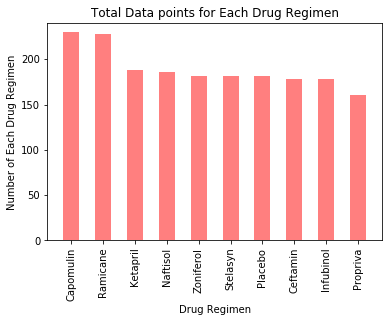

In [72]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

regimen=new_df["Drug Regimen"].value_counts()
x_axis=np.arange(len(regimen))

regimen.plot(kind="bar", facecolor='red', alpha=0.5)
plt.title("Total Data points for Each Drug Regimen")
plt.ylabel("Number of Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(regimen)+10)
plt.tight_layout
plt.show()




Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64


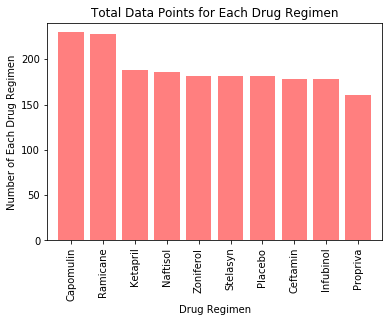

In [73]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

regimen=new_df["Drug Regimen"].value_counts()
print(regimen)

x_axis=np.arange(len(regimen))

plt.bar(x_axis, regimen, color='r', alpha=0.5, align="center")
tick_loc=[value for value in x_axis]
plt.xticks(tick_loc, regimen.keys(), rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(regimen)+10)

plt.title("Total Data Points for Each Drug Regimen")
plt.ylabel("Number of Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.tight_layout
plt.show()

## Pie plots

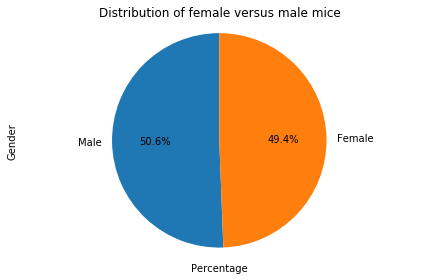

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender=new_df['Sex'].value_counts()
keys=gender.keys()
gender_plot=gender.plot(kind="pie", y=keys, autopct='%1.1f%%',startangle=90, shadow=False, title="Distribution of female versus male mice")
gender_plot.set_ylabel("Gender")

plt.axis("equal")
plt.xlabel("Percentage")
plt.tight_layout()
plt.show()


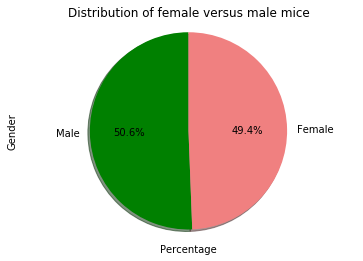

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

keys=gender.keys()
counts=new_df['Sex'].value_counts().to_list()
colors=["green", "lightcoral"]
explode=(0,0)

plt.title("Distribution of female versus male mice")
plt.pie(counts, explode=explode, labels=keys, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.ylabel("Gender")
plt.xlabel("Percentage")
plt.show()




## Quartiles, outliers and boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

vol_capomulin=new_df[new_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].last()
vol_ramicane=new_df[new_df["Drug Regimen"] == "Ramicane"].groupby("Mouse ID")["Tumor Volume (mm3)"].last()
vol_infubinol=new_df[new_df["Drug Regimen"] == "Infubinol"].groupby("Mouse ID")["Tumor Volume (mm3)"].last()
vol_ceftamin=new_df[new_df["Drug Regimen"] == "Ceftamin"].groupby("Mouse ID")["Tumor Volume (mm3)"].last()

vollist=(vol_capomulin,vol_ramicane,vol_infubinol,vol_ceftamin)
drugnames=("Capomulin","Ramicane", "Infubinol","Ceftamin")

new_df1=pd.DataFrame({'Capomulin': vol_capomulin.values,
          'Ramicane':vol_ramicane.values,
          'Infubinol':vol_infubinol.values,
          'Ceftamin':vol_ceftamin.values })


# Summary table for quartiles and IQR and outliers
for x, y in zip(vollist, drugnames):
    print(f"Quartiles/Outliers Summary for treatment regimen: {y}")
    quartiles= x.quantile([0.25,0.5,0.75])
    lowerq=round(quartiles[0.25],2)
    upperq=round(quartiles[0.75],2)
    iqr=upperq-lowerq
    print(f"The lower quartile of occupancy for is: {lowerq}.")
    print(f"The upper quartile of occupancy for is: {upperq}.")
    print(f"The interquartile range of occupancy for is: {iqr:.2f}.")
    print(f"The the median of occupancy for is: {quartiles[0.5]:.2f}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values for below {lower_bound:.2f} could be outliers.")
    print(f"Values for above {upper_bound:.2f} could be outliers.")
    outlier=new_df1.loc[(new_df1[y] < lower_bound)|(new_df1[y] > upper_bound), y].values
    print(f"The outliers for {y} are: \n{outlier}\n\n")




Quartiles/Outliers Summary for treatment regimen: Capomulin
The lower quartile of occupancy for is: 32.38.
The upper quartile of occupancy for is: 40.16.
The interquartile range of occupancy for is: 7.78.
The the median of occupancy for is: 38.13.
Values for below 20.71 could be outliers.
Values for above 51.83 could be outliers.
The outliers for Capomulin are: 
[]


Quartiles/Outliers Summary for treatment regimen: Ramicane
The lower quartile of occupancy for is: 31.56.
The upper quartile of occupancy for is: 40.66.
The interquartile range of occupancy for is: 9.10.
The the median of occupancy for is: 36.56.
Values for below 17.91 could be outliers.
Values for above 54.31 could be outliers.
The outliers for Ramicane are: 
[]


Quartiles/Outliers Summary for treatment regimen: Infubinol
The lower quartile of occupancy for is: 54.05.
The upper quartile of occupancy for is: 65.53.
The interquartile range of occupancy for is: 11.48.
The the median of occupancy for is: 60.17.
Values for be

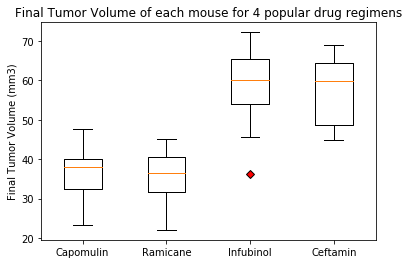

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# on the same graph

green_diamond = dict(markerfacecolor='red', marker='D')

new_dict={'Capomulin':vol_capomulin.values,
          'Ramicane':vol_ramicane.values,
          'Infubinol':vol_infubinol.values,
          'Ceftamin':vol_ceftamin.values}

fig, ax=plt.subplots()
ax.boxplot(new_dict.values(),flierprops=green_diamond)
ax.set_xticklabels(new_dict.keys())
ax.set_title(f'Final Tumor Volume of each mouse for 4 popular drug regimens')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()





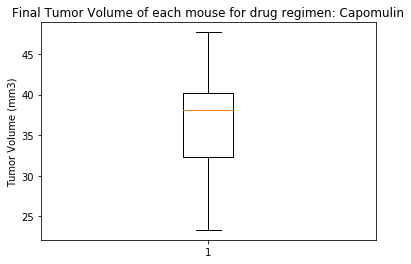

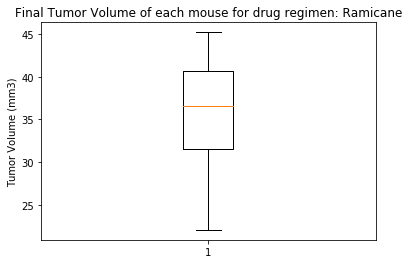

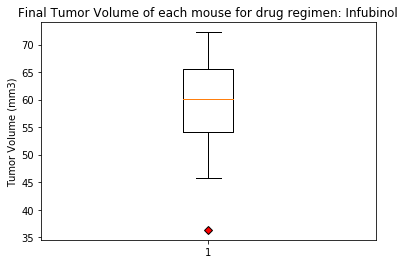

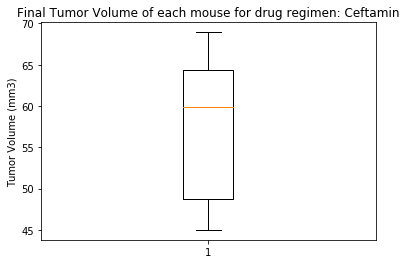

In [66]:
# Extra bonus:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# on different graphs

for x, y in zip(vollist, drugnames):
    fig1, ax1 = plt.subplots()
    ax1.set_title(f'Final Tumor Volume of each mouse for drug regimen: {y}')
    ax1.set_ylabel('Tumor Volume (mm3)')
    ax1.boxplot(x, flierprops=green_diamond)
    plt.show()



## Line and scatter plots

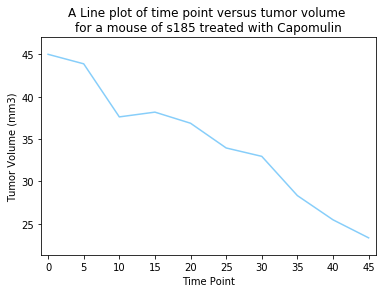

In [67]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouseid = "s185"

cap_df=new_df.loc[(new_df["Drug Regimen"] == "Capomulin") & (new_df["Mouse ID"] == mouseid), ("Mouse ID", "Timepoint", "Tumor Volume (mm3)")]

plt.plot(cap_df["Timepoint"], cap_df["Tumor Volume (mm3)"], "lightskyblue")
plt.xticks(cap_df["Timepoint"])
plt.ylim(min(cap_df["Tumor Volume (mm3)"])-2, max(cap_df["Tumor Volume (mm3)"])+2)
plt.xlim(min(cap_df["Timepoint"])-1, max(cap_df["Timepoint"])+1)
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"A Line plot of time point versus tumor volume \nfor a mouse of {mouseid} treated with Capomulin")
plt.show()







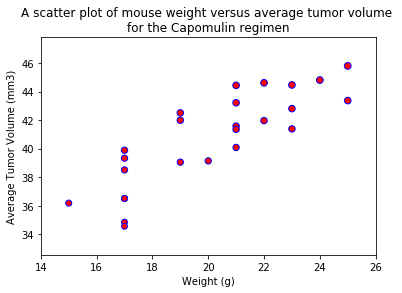

In [68]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatter_df=new_df.loc[new_df["Drug Regimen"] == "Capomulin", ("Mouse ID", "Weight (g)", "Timepoint", "Tumor Volume (mm3)")]
avgtumorvol=pd.DataFrame(scatter_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
wgt=pd.DataFrame(scatter_df.groupby("Mouse ID")["Weight (g)"].mean())

merge=pd.merge(avgtumorvol, wgt, on="Mouse ID", how="outer")
merge=merge.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

x_values=merge["Weight (g)"]
y_values=merge["Average Tumor Volume (mm3)"]

scatter_plot=plt.scatter(x_values, y_values, marker='o', facecolors='red', edgecolors="blue", s=y_values, alpha=1)
plt.title("A scatter plot of mouse weight versus average tumor volume \nfor the Capomulin regimen")
plt.ylim(min(y_values)-2, max(y_values)+2)
plt.xlim(min(x_values)-1, max(x_values)+1)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



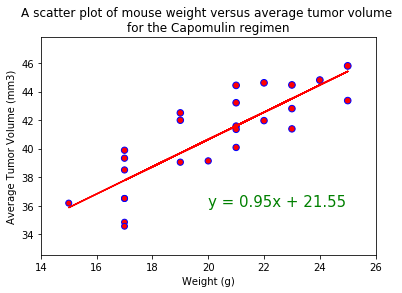

Regression analysis summary for mouse weight and average tumor volume for the Capomulin regimen:
The linear equation is: y = 0.95x + 21.55.
The p value is: 0.0000.
The r-squared value is: 0.84.
The correlation for both factors is 0.84.


In [69]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation=st.pearsonr(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o', facecolors='red', edgecolors="blue", s=y_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="green")
plt.title("A scatter plot of mouse weight versus average tumor volume \nfor the Capomulin regimen")
plt.ylim(min(y_values)-2, max(y_values)+2)
plt.xlim(min(x_values)-1, max(x_values)+1)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

print("Regression analysis summary for mouse weight and average tumor volume for the Capomulin regimen:")
print(f'The linear equation is: {line_eq}.')
print(f'The p value is: {pvalue:.4f}.')
print(f"The r-squared value is: {rvalue:.2f}.")
print(f'The correlation for both factors is {correlation[0]:.2f}.')
